In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.572726,0.760028,-1.051796e-06,0.445242,0.677383,-0.035525,0.347635,0.549808,-0.050557,0.315662,...,0.621644,0.338643,-0.053494,0.608120,0.423243,-0.040468,0.596956,0.496412,-0.018641,A
1,0.568681,0.754171,-1.072320e-06,0.442010,0.672970,-0.035510,0.347385,0.541486,-0.050030,0.315983,...,0.618906,0.333602,-0.054898,0.605310,0.420342,-0.041774,0.594862,0.494325,-0.019632,A
2,0.568922,0.757488,-1.078921e-06,0.444811,0.675923,-0.034869,0.348737,0.544716,-0.049236,0.315190,...,0.620083,0.332421,-0.056705,0.605348,0.419467,-0.043829,0.594168,0.494171,-0.021807,A
3,0.564618,0.764077,-1.080086e-06,0.439601,0.677238,-0.031996,0.344900,0.544066,-0.045189,0.310939,...,0.614316,0.335570,-0.054818,0.599130,0.421692,-0.040589,0.588077,0.495607,-0.018175,A
4,0.558755,0.770349,-1.138790e-06,0.435057,0.676697,-0.024369,0.347374,0.535269,-0.034331,0.319918,...,0.615863,0.337259,-0.063788,0.595307,0.423725,-0.047416,0.583184,0.498430,-0.023299,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,0.492324,0.778137,-4.800247e-07,0.393604,0.704233,-0.041540,0.339509,0.522081,-0.059437,0.357198,...,0.584095,0.445122,-0.093668,0.553432,0.533914,-0.068132,0.547032,0.572865,-0.034930,T
1695,0.510782,0.787434,-3.733719e-07,0.416135,0.715161,-0.045720,0.367557,0.538281,-0.065232,0.386017,...,0.610206,0.451668,-0.096816,0.580886,0.541157,-0.074843,0.571230,0.578485,-0.043136,T
1696,0.527558,0.786780,-4.179045e-07,0.431230,0.708706,-0.044102,0.383135,0.531106,-0.061386,0.404744,...,0.625751,0.448150,-0.085323,0.593794,0.535688,-0.064972,0.581313,0.573201,-0.034920,T
1697,0.532644,0.786100,-3.502409e-07,0.437118,0.714631,-0.048260,0.389077,0.538846,-0.067936,0.406689,...,0.630690,0.454709,-0.089292,0.600417,0.542281,-0.067787,0.589735,0.575356,-0.036999,T


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.572726,0.760028,-1.051796e-06,0.445242,0.677383,-0.035525,0.347635,0.549808,-0.050557,0.315662,...,0.621644,0.338643,-0.053494,0.608120,0.423243,-0.040468,0.596956,0.496412,-0.018641,A
1,0.568681,0.754171,-1.072320e-06,0.442010,0.672970,-0.035510,0.347385,0.541486,-0.050030,0.315983,...,0.618906,0.333602,-0.054898,0.605310,0.420342,-0.041774,0.594862,0.494325,-0.019632,A
2,0.568922,0.757488,-1.078921e-06,0.444811,0.675923,-0.034869,0.348737,0.544716,-0.049236,0.315190,...,0.620083,0.332421,-0.056705,0.605348,0.419467,-0.043829,0.594168,0.494171,-0.021807,A
3,0.564618,0.764077,-1.080086e-06,0.439601,0.677238,-0.031996,0.344900,0.544066,-0.045189,0.310939,...,0.614316,0.335570,-0.054818,0.599130,0.421692,-0.040589,0.588077,0.495607,-0.018175,A
4,0.558755,0.770349,-1.138790e-06,0.435057,0.676697,-0.024369,0.347374,0.535269,-0.034331,0.319918,...,0.615863,0.337259,-0.063788,0.595307,0.423725,-0.047416,0.583184,0.498430,-0.023299,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,0.492324,0.778137,-4.800247e-07,0.393604,0.704233,-0.041540,0.339509,0.522081,-0.059437,0.357198,...,0.584095,0.445122,-0.093668,0.553432,0.533914,-0.068132,0.547032,0.572865,-0.034930,T
1695,0.510782,0.787434,-3.733719e-07,0.416135,0.715161,-0.045720,0.367557,0.538281,-0.065232,0.386017,...,0.610206,0.451668,-0.096816,0.580886,0.541157,-0.074843,0.571230,0.578485,-0.043136,T
1696,0.527558,0.786780,-4.179045e-07,0.431230,0.708706,-0.044102,0.383135,0.531106,-0.061386,0.404744,...,0.625751,0.448150,-0.085323,0.593794,0.535688,-0.064972,0.581313,0.573201,-0.034920,T
1697,0.532644,0.786100,-3.502409e-07,0.437118,0.714631,-0.048260,0.389077,0.538846,-0.067936,0.406689,...,0.630690,0.454709,-0.089292,0.600417,0.542281,-0.067787,0.589735,0.575356,-0.036999,T


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1699, 63)
Labels shape = (1699,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['S', 'A', 'AM', 'I', 'S', 'T', 'S', 'B', 'A', 'A', 'LANGUAGE', 'A',
       'LANGUAGE', 'A', 'AM', 'S', 'LEARNING', 'T', 'LEARNING', 'B',
       'HELLO', 'S', 'T', 'LANGUAGE', 'A', 'S', 'B', 'A', 'AM', 'A', 'AM',
       'B', 'I', 'T', 'LEARNING', 'HELLO', 'T', 'A', 'B', 'LANGUAGE',
       'LANGUAGE', 'B', 'A', 'B', 'T', 'LEARNING', 'AM', 'HELLO', 'S',
       'T', 'LEARNING', 'LEARNING', 'T', 'LANGUAGE', 'LEARNING', 'AM',
       'LEARNING', 'LANGUAGE', 'LANGUAGE', 'LEARNING', 'T', 'AM', 'T',
       'T', 'T', 'LANGUAGE', 'A', 'AM', 'T', 'LEARNING', 'LANGUAGE', 'I',
       'A', 'T', 'I', 'A', 'LANGUAGE', 'LEARNING', 'HELLO', 'T',
       'LEARNING', 'LEARNING', 'AM', 'S', 'LEARNING', 'HELLO', 'I',
       'LEARNING', 'LANGUAGE', 'HELLO', 'AM', 'HELLO', 'LEARNING', 'B',
       'LANGUAGE', 'LEARNING', 'LEARNING', 'LEARNING', 'T', 'S', 'B', 'B',
       'T', 'AM', 'LANGUAGE', 'I', 'LANGUAGE', 'HELLO', 'LANGUAGE',
       'HELLO', 'A', 'B', 'T', 'B', 'T', 'I', 'B', 'HELLO', 'B',
       'LEA

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

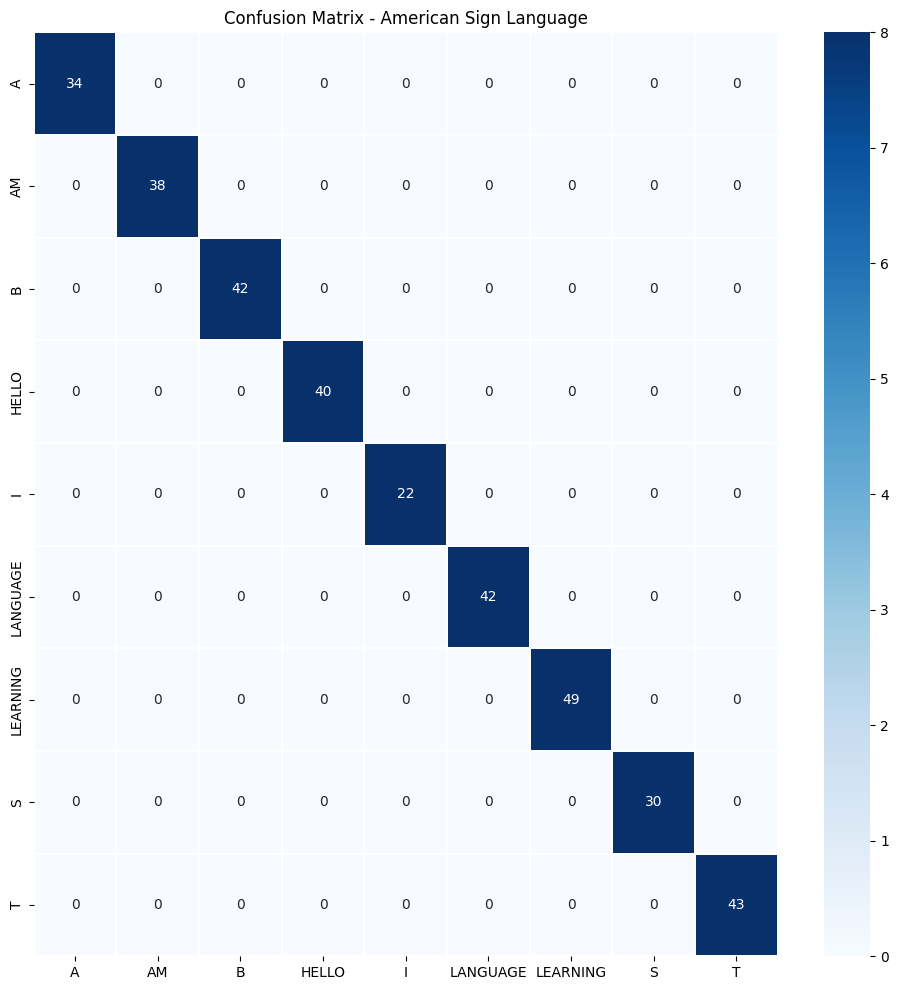

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)